### Import necessary libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

### Data Collection & Analysis

In [2]:
data = pd.read_csv('Mall_Customers.csv')

### 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(200, 5)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 200
Number of Columns 5


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 5.Check Null Values In The Dataset

In [8]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
features = data[['Annual Income (k$)','Spending Score (1-100)']]

In [12]:
#X= data.iloc[:,[3,4]].values

In [13]:
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Data visualization raw Data

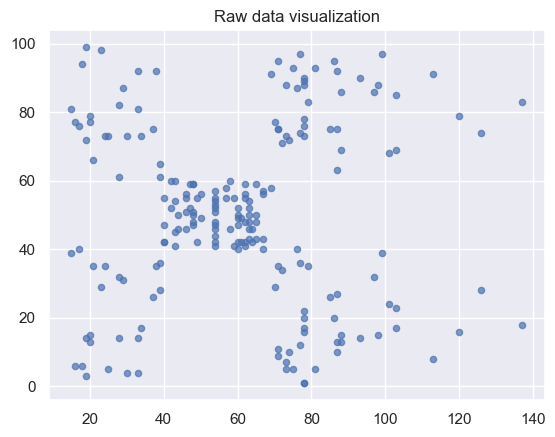

In [14]:

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',data=features,s=20, alpha=0.7)
plt.title("Raw data visualization")
plt.show()

### 7. Kmeans Clustering testing

In [15]:
from sklearn.cluster import KMeans

In [16]:
k_means = KMeans(n_clusters=4)
model1=k_means.fit(features)
y=model1.predict(features)
print(y)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### 8. Elbow Method To Find Optimal Number of Clusters

In [17]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i,n_init=10)
    k_means.fit(features)
    wcss.append(k_means.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [18]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30241.343617936593,
 24986.52564064288,
 21806.81299869546,
 19669.71099830122]

In [19]:
import matplotlib.pyplot as plt

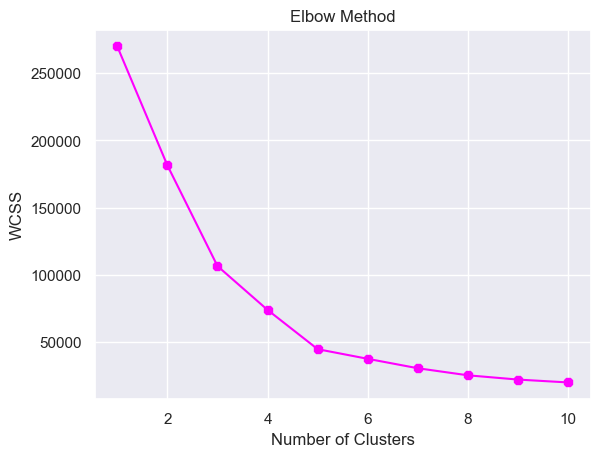

In [20]:
plt.plot(range(1,11),wcss,color="magenta", marker="8")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### 9. Model Training

In [21]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [22]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++',n_init=10)
k_means.fit(X)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=0)

In [23]:
y_means = k_means.predict(X)
print(type(y_means))
print(y_means)

<class 'numpy.ndarray'>
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [24]:
#print(X.iloc[y_means==0,0])

### Visualise the Predictions

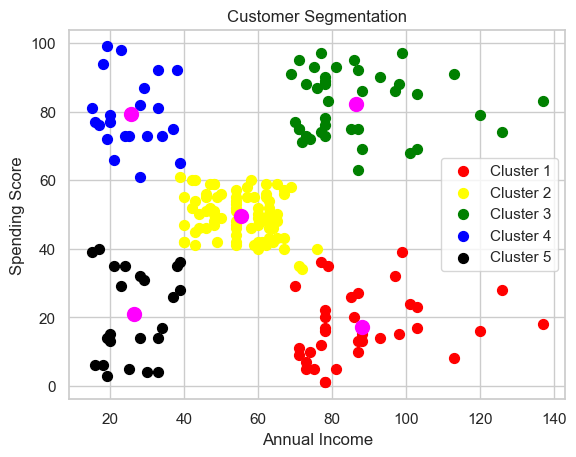

In [25]:
sns.set_theme(style="whitegrid")
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50,c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=50,c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=50,c='black',label="Cluster 5")
# plot the centroids
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [26]:
data['CLuster_Number']=y_means
Newdf=data
Newdf.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),CLuster_Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


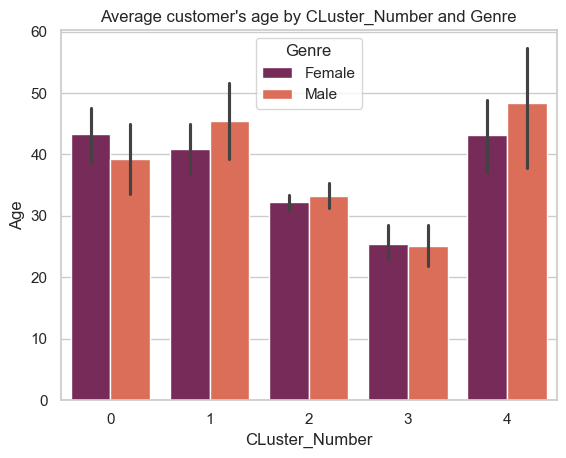

<Figure size 800x600 with 0 Axes>

In [27]:
sns.barplot(x="CLuster_Number", y="Age", palette='rocket', data=Newdf,hue='Genre')
plt.xlabel("CLuster_Number")
plt.ylabel("Age")
sns.set_theme(style="whitegrid")
plt.title("Average customer's age by CLuster_Number and Genre")
# display the plot
plt.figure(figsize=(8, 6))
plt.show()

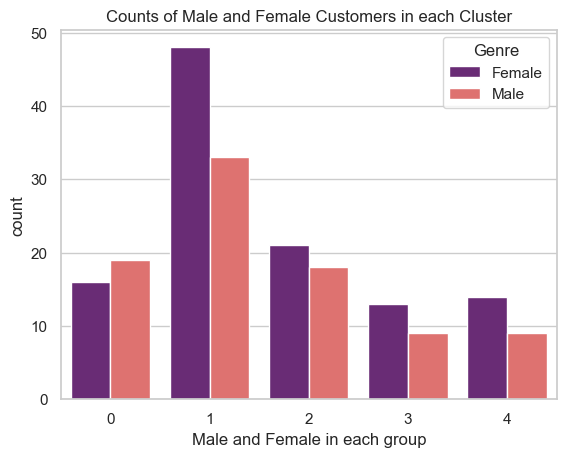

In [29]:
sns.set_theme(style="whitegrid")
sns.countplot(x = 'CLuster_Number', hue = 'Genre', data = Newdf, palette = 'magma')
plt.title('Counts of Male and Female Customers in each Cluster')
plt.xlabel("Male and Female in each group")
plt.show()

### 10. Evaluating the KMeans Model Using Silhouette Score

In [59]:
from sklearn.metrics import silhouette_score

def evaluate_kmeans_silhouette(features):
    # Calculate the silhouette score
    score = silhouette_score(features,y_means)
    return score
silhouette_score = evaluate_kmeans_silhouette(X)
print(f'Silhouette Score: {silhouette_score}')


Silhouette Score: 0.553931997444648


 Interpreting the Silhouette Score?
The Silhouette Score ranges from -1 to 1:
A score close to 1 indicates that the samples are well clustered.
A score around 0 indicates that the samples are on or very close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the samples might have been assigned to the wrong cluster.

#### Add a new data point to the mix

In [70]:
point = np.array([[15,45]])
print(point)
k_means.predict(point)

[[15 45]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

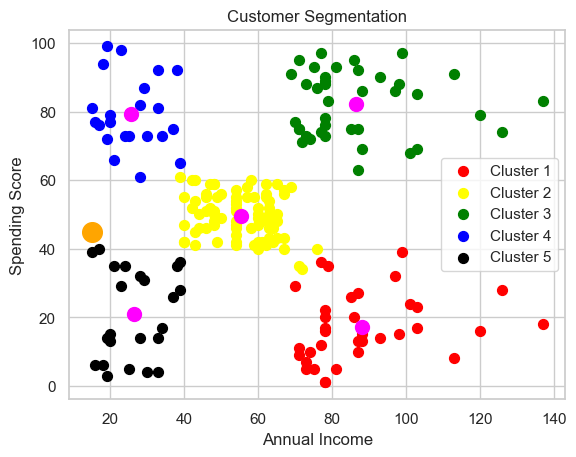

In [71]:
px = point[:, 0]
py = point[:, 1]

sns.set_theme(style="whitegrid")
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50,c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=50,c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=50,c='black',label="Cluster 5")
# plot the centroids
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
#new data point graph
plt.scatter(px, py, c='orange', s=200)

plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


#### Show the distance from the point to each center.

In [72]:
d = []
for i in range(5):
    d.append(np.sqrt((px - k_means.cluster_centers_[i][0])**2 + (py - k_means.cluster_centers_[i][1])**2))

print(d)

[array([78.33168619]), array([40.54884098]), array([80.59934922]), array([35.99908171]), array([26.60770103])]


### 11. Use your Model to predict real life data of new customer

In [73]:
def New_customer(income,spending):
    point = np.array([[income,spending]])
    customer_group =k_means.predict(point)[0]
    return customer_group

print("Enter the new customer data:")
income=input("Enter Customer annual income: ")
spending=input("Enter Customer annual spending: ")
print("The Group cluster it belongs is:",New_customer(income,spending))

Enter the new customer data:


Enter Customer annual income:  56
Enter Customer annual spending:  67


The Group cluster it belongs is: 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Save The Model using Joblib

In [78]:
import joblib
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [79]:
joblib_model = joblib.load("customer_segmentation")

In [80]:
joblib_model.predict([[15,39]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

### GUI

In [48]:
from tkinter import *
import joblib

In [81]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model = joblib.load('customer_segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium annual spend").grid(row=31)
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend").grid(row=31)
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend").grid(row=31)
    elif result[0]==3:
        Label(master, text="Customers low annual income but high annual spend").grid(row=31)
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend").grid(row=31)

master = Tk()
master.title("Customer Segmentation Using Machine Learning")


label = Label(master, text = "Customer Segmentation Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master,text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)


e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This Customer belongs to cluster no:  2
